## <span style='color:navy'> Prepping </span>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('../data/perfumes_df_ready.csv')

In [3]:
data.shape

(4478, 105)

In [4]:
pd.set_option('max_columns', 110)

<span style='color:navy'> I'm gonna use a library of functions I wrote for this purpose for this specific project. the `cleaning_functions.py` file is found in the repo on GitHub in the main folder </span> <br />
<span style='color:navy'> These functions were mostly developed and annotated while creating the other notebooks, refer to those also to understand every line in them; specially the in the classification notebook </span>

In [5]:
import cleaning_functions as clean

In [6]:
data = clean.ready_df(data)

In [7]:
pd.set_option('max_columns', 110)
data.head()

,overall_rating,total_num_voters,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,...,designer_Lacoste Fragrances,designer_Lancome,designer_Marc Jacobs,designer_Narciso Rodriguez,designer_Nina Ricci,designer_Paco Rabanne,designer_Prada,designer_Ralph Lauren,designer_Salvador Dali,designer_Serge Lutens,designer_Tom Ford,designer_Valentino,designer_Van Cleef & Arpels,designer_Versace,designer_Viktor&Rolf,designer_Yves Rocher,designer_Yves Saint Laurent,group_Aromatic,group_Aromatic Aquatic,group_Aromatic Fougere,group_Aromatic Fruity,group_Aromatic Green,group_Aromatic Spicy,group_Chypre,group_Chypre Floral,group_Chypre Fruity,group_Citrus,group_Citrus Aromatic,group_Citrus Gourmand,group_Floral,group_Floral Aldehyde,group_Floral Aquatic,group_Floral Fruity,group_Floral Fruity Gourmand,group_Floral Green,group_Floral Woody Musk,group_Leather,group_Oriental,group_Oriental Floral,group_Oriental Fougere,group_Oriental Spicy,group_Oriental Vanilla,group_Oriental Woody,group_Woody,group_Woody Aquatic,group_Woody Aromatic,group_Woody Chypre,group_Woody Floral Musk,group_Woody Spicy,group_not found,gender_men,gender_unknown,gender_women,gender_women and men,perfume_id
0,4.11,410.0,14,25,35,14,12,47,34,20,31,279,40,272,3,100,74,26,3,20,54,5,56,0.0,0.0,0.0,80.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.94,2311.0,33,39,173,402,97,87,285,366,111,2021,638,1252,64,100,70,37,55,41,12,58,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.65,123.0,2,7,12,9,6,11,26,8,9,50,12,80,-1,44,45,100,22,35,13,28,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,87.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
3,1.67,9.0,5,1,0,0,2,3,1,0,3,-1,-1,11,-1,20,1,100,40,40,40,80,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3
4,4.44,47.0,1,0,0,2,0,2,2,4,5,21,6,189,1,100,50,10,25,15,5,25,40,0.0,0.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4


In [8]:
data.shape

(4478, 179)

In [9]:
# making sure we don't have any nulls in the main data frame
nulls = data.isnull().sum().to_frame()
nulls.loc[nulls[0] != 0, :]

,0


In [10]:
data = clean.classify_target(data)

In [11]:
# making the training and testing data frames
train_df, test_df = clean.make_frames(data)
# don't mind the warning, it worked anyway

print(train_df.shape, test_df.shape)

(4444, 179) (34, 178)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
train_df = clean.categorize_classes(train_df)
# don't mind the warning, it executed anyway

/Users/hayatoumy/Documents/GA files/my_practice/attempts_perfume_analysis/cleaning_functions.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['labels'] = df['ratings_classes'].map(classes_dict)


In [13]:
train_df.head(2)

,total_num_voters,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,animalic,...,designer_Marc Jacobs,designer_Narciso Rodriguez,designer_Nina Ricci,designer_Paco Rabanne,designer_Prada,designer_Ralph Lauren,designer_Salvador Dali,designer_Serge Lutens,designer_Tom Ford,designer_Valentino,designer_Van Cleef & Arpels,designer_Versace,designer_Viktor&Rolf,designer_Yves Rocher,designer_Yves Saint Laurent,group_Aromatic,group_Aromatic Aquatic,group_Aromatic Fougere,group_Aromatic Fruity,group_Aromatic Green,group_Aromatic Spicy,group_Chypre,group_Chypre Floral,group_Chypre Fruity,group_Citrus,group_Citrus Aromatic,group_Citrus Gourmand,group_Floral,group_Floral Aldehyde,group_Floral Aquatic,group_Floral Fruity,group_Floral Fruity Gourmand,group_Floral Green,group_Floral Woody Musk,group_Leather,group_Oriental,group_Oriental Floral,group_Oriental Fougere,group_Oriental Spicy,group_Oriental Vanilla,group_Oriental Woody,group_Woody,group_Woody Aquatic,group_Woody Aromatic,group_Woody Chypre,group_Woody Floral Musk,group_Woody Spicy,group_not found,gender_men,gender_unknown,gender_women,gender_women and men,perfume_id,ratings_classes,labels
0,410.0,14,25,35,14,12,47,34,20,31,279,40,272,3,100,74,26,3,20,54,5,56,0.0,0.0,0.0,80.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.5,8
1,2311.0,33,39,173,402,97,87,285,366,111,2021,638,1252,64,100,70,37,55,41,12,58,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4.0,7


In [14]:
test_df.head(2)

,total_num_voters,longvity_poor,longvity_weak,longvity_moderate,longvity_long_lasting,longvity_very_long_lasting,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,have_it,had_it,want_it,my_signature,love_it,like_it,dislike_it,spring,summer,fall,day,night,salty,smoky,Unnamed: 35,coconut,white floral,fresh spicy,white wine,vanilla,warm spicy,whiskey,ginger,conifer,caramel,woody,vinyl,tropical,musk,fruity,coca cola,powdery,floral,aromatic,milky,yellow floral,nutty,cacao,aquatic,camphor,red fruits,sweet,oud,almond,animalic,...,designer_Lacoste Fragrances,designer_Lancome,designer_Marc Jacobs,designer_Narciso Rodriguez,designer_Nina Ricci,designer_Paco Rabanne,designer_Prada,designer_Ralph Lauren,designer_Salvador Dali,designer_Serge Lutens,designer_Tom Ford,designer_Valentino,designer_Van Cleef & Arpels,designer_Versace,designer_Viktor&Rolf,designer_Yves Rocher,designer_Yves Saint Laurent,group_Aromatic,group_Aromatic Aquatic,group_Aromatic Fougere,group_Aromatic Fruity,group_Aromatic Green,group_Aromatic Spicy,group_Chypre,group_Chypre Floral,group_Chypre Fruity,group_Citrus,group_Citrus Aromatic,group_Citrus Gourmand,group_Floral,group_Floral Aldehyde,group_Floral Aquatic,group_Floral Fruity,group_Floral Fruity Gourmand,group_Floral Green,group_Floral Woody Musk,group_Leather,group_Oriental,group_Oriental Floral,group_Oriental Fougere,group_Oriental Spicy,group_Oriental Vanilla,group_Oriental Woody,group_Woody,group_Woody Aquatic,group_Woody Aromatic,group_Woody Chypre,group_Woody Floral Musk,group_Woody Spicy,group_not found,gender_men,gender_unknown,gender_women,gender_women and men,perfume_id
307,-1.0,0,0,0,0,0,1,0,0,2,-1,-1,11,-1,1,1,1,1,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,307
460,-1.0,0,0,0,0,0,1,0,1,0,-1,-1,24,-1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,127.0,0.0,130.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,460


***
## <span style='color:navy'> Neural Networks </span>

In [15]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['ratings_classes', 'labels'], axis = 1)
y = train_df['labels']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 62019)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Preparing the target variable for keras** <br />
When we have multi-class classification problem. We need to change the target variable in one of two ways: 
- `train_labels = np.array(y_train)` and same for y_test. Then use `sparse_categorical_crossentropy` in compiling the Keras model. 
- or use `to_categorical` from `keras.utils`, encode y_test and y_train, and use them in the model fitting. And use `categorical_crossentropy` in compiling. 

The latter method didn't work and generated a dimension error. The first method is easier and straight forward. it keeps the target as integers.

In [27]:
import numpy as np
train_labels = np.array(y_train)
test_labels = np.array(y_test)
# Must use `sparse_categorical_crossentropy` instead of `categorical_crossentropy` in compiling model below

In [20]:
from keras.layers import Dense
from keras.models import Sequential

In [28]:
def run_model(nodes, epk, batch):
    """
    Parameters:
    -----------
    nodes: how many nodes you want in the Dense layer
    epk: how many epochs in the model fitting
    batch: what batch_size you want for training
    """
    
    model = Sequential()
    
    #input 
    model.add(Dense(nodes, activation = 'relu', input_shape = (X_train.shape[1], )))
    
    # one hidden layer
    model.add(Dense(nodes, activation  = 'relu'))
    
    #output
    model.add(Dense(nodes, activation = 'softmax'))
    
    # compile
    model.compile(optimizer = 'rmsprop', # or 'adam'
                 loss = 'sparse_categorical_crossentropy', 
                 metrics = ['accuracy']) 
    
    history = model.fit(X_train, 
                        train_labels, 
                       epochs = epk, 
                       batch_size = batch, 
                       validation_data = (X_test, test_labels))
    
    return history

In [22]:
def plot_loss_acc(history):
    """
    Needs the outcome of run_model() as input.
    Plots accuracy and loss over training and validation 
    """
    
    epochs = range(1, len(history.history['loss']) + 1)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    ax[0].plot(epochs, history.history['loss'], 'bo', label = 'training loss'.title()) 
    ax[0].plot(epochs, history.history['val_loss'], 'b', label = 'validation loss'.title()) 
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_xticks(ticks = epochs)
    ax[0].legend();
    
    # plotting the values of the accuracy of training and validation
    epochs = range(1, len(history.history['acc']) + 1)
    ax[1].plot(epochs, history.history['acc'], 'bo', label = 'training accuracy'.title()) 
    ax[1].plot(epochs, history.history['val_acc'], 'b', label = 'validation accuracy'.title()) 
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_xticks(ticks = epochs) 
    ax[1].set_ylabel('Accuracy') 
    ax[1].legend();

In [29]:
hist_1 = run_model(32, 10, 128)

Instructions for updating:
Use tf.cast instead.
Train on 3555 samples, validate on 889 samples
Epoch 1/10
3555/3555 [==============================] - 1s 219us/step - loss: 2.3462 - acc: 0.4096 - val_loss: 1.7623 - val_acc: 0.4837
Epoch 2/10
3555/3555 [==============================] - 0s 35us/step - loss: 1.5217 - acc: 0.4934 - val_loss: 1.3064 - val_acc: 0.5433
Epoch 3/10
3555/3555 [==============================] - 0s 35us/step - loss: 1.2316 - acc: 0.5395 - val_loss: 1.1646 - val_acc: 0.5681
Epoch 4/10
3555/3555 [==============================] - 0s 35us/step - loss: 1.1000 - acc: 0.5730 - val_loss: 1.0923 - val_acc: 0.5928
Epoch 5/10
3555/3555 [==============================] - 0s 34us/step - loss: 1.0052 - acc: 0.6076 - val_loss: 1.0258 - val_acc: 0.6232
Epoch 6/10
3555/3555 [==============================] - 0s 34us/step - loss: 0.9229 - acc: 0.6402 - val_loss: 0.9728 - val_acc: 0.6389
Epoch 7/10
3555/3555 [==============================] - 0s 35us/step - loss: 0.8490 - acc: 0.6

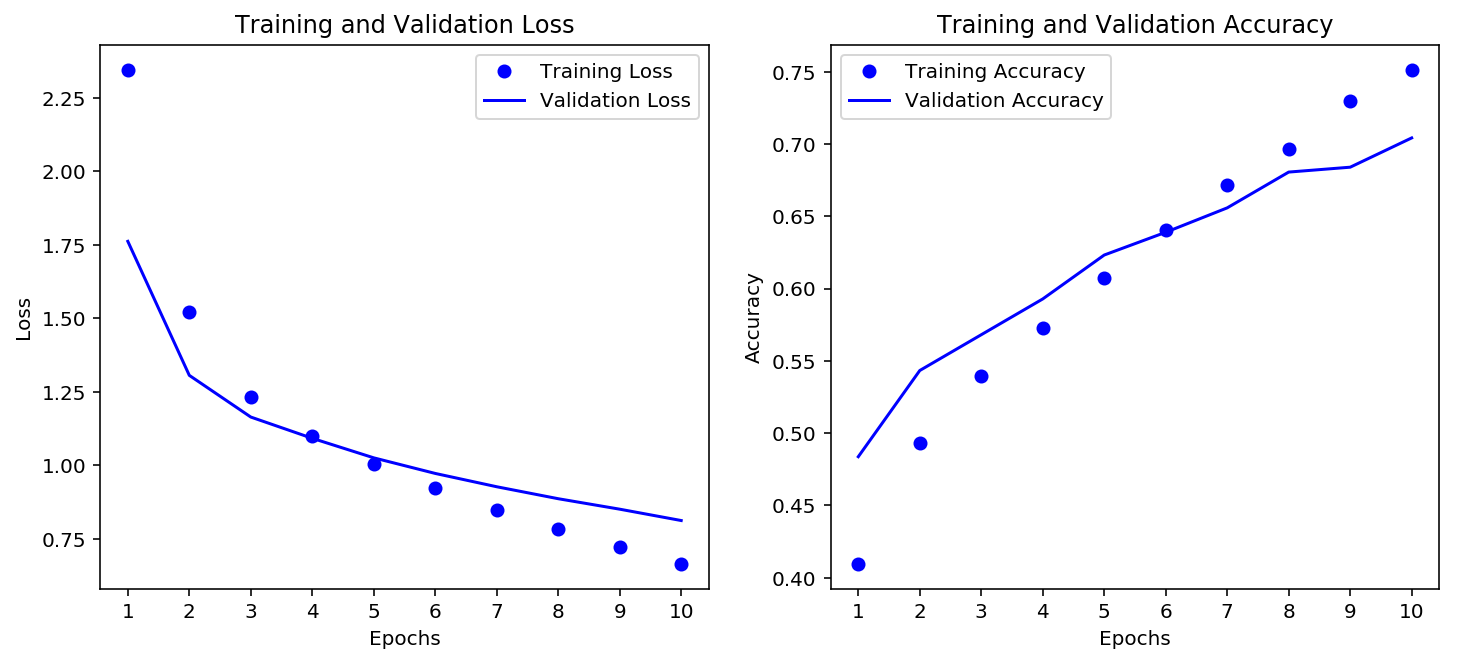

In [33]:
plot_loss_acc(hist_1)

In [101]:
hist_2 = run_model(64, 10, 128)

Train on 3555 samples, validate on 889 samples
Epoch 1/10
3555/3555 [==============================] - 1s 286us/step - loss: 2.4563 - acc: 0.3795 - val_loss: 1.4589 - val_acc: 0.5253
Epoch 2/10
3555/3555 [==============================] - 0s 50us/step - loss: 1.2943 - acc: 0.5350 - val_loss: 1.1719 - val_acc: 0.5714
Epoch 3/10
3555/3555 [==============================] - 0s 56us/step - loss: 1.0713 - acc: 0.5876 - val_loss: 1.0291 - val_acc: 0.6153
Epoch 4/10
3555/3555 [==============================] - 0s 91us/step - loss: 0.9234 - acc: 0.6430 - val_loss: 0.9434 - val_acc: 0.6434
Epoch 5/10
3555/3555 [==============================] - 0s 61us/step - loss: 0.8083 - acc: 0.6923 - val_loss: 0.8667 - val_acc: 0.6614
Epoch 6/10
3555/3555 [==============================] - 0s 50us/step - loss: 0.7091 - acc: 0.7350 - val_loss: 0.7972 - val_acc: 0.6895
Epoch 7/10
3555/3555 [==============================] - 0s 51us/step - loss: 0.6290 - acc: 0.7738 - val_loss: 0.7513 - val_acc: 0.7165
Epoch 8

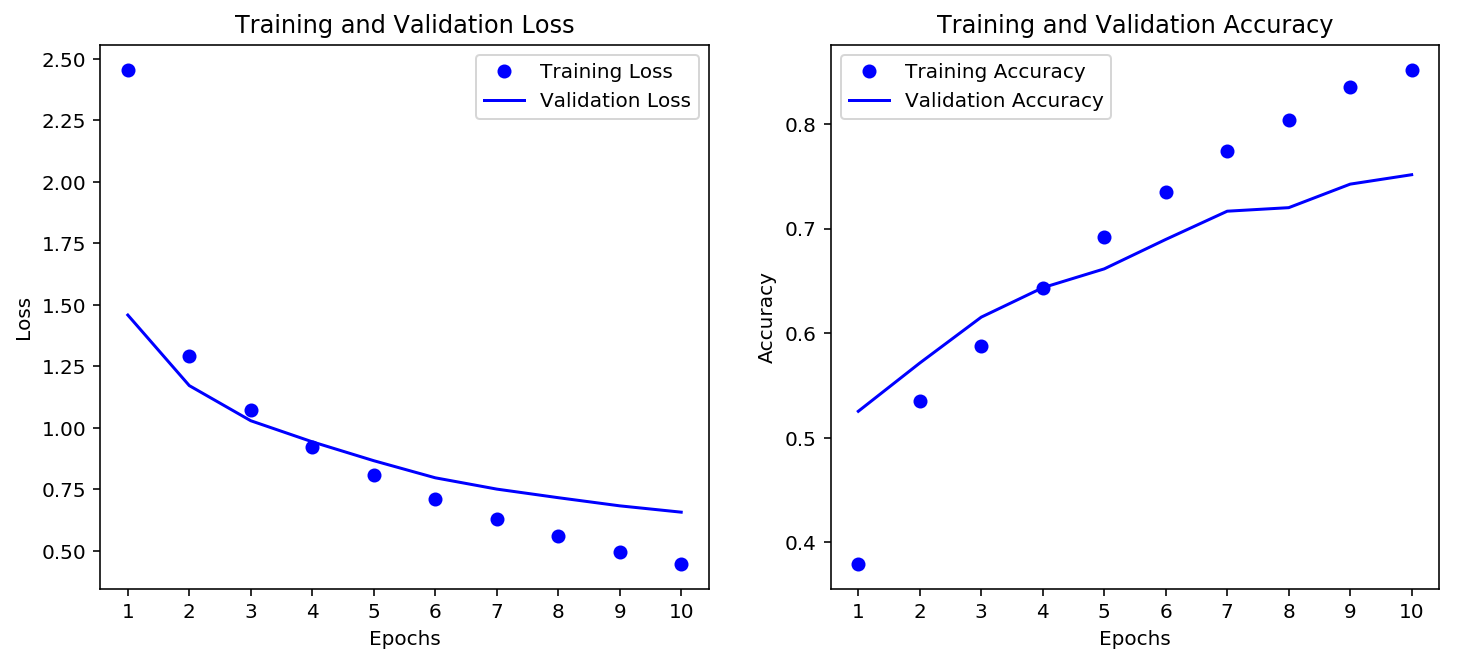

In [102]:
plot_loss_acc(hist_2)

In [104]:
hist_3 = run_model(64,6, 128)

Train on 3555 samples, validate on 889 samples
Epoch 1/6
3555/3555 [==============================] - 1s 350us/step - loss: 2.4173 - acc: 0.3904 - val_loss: 1.4406 - val_acc: 0.5219
Epoch 2/6
3555/3555 [==============================] - 0s 50us/step - loss: 1.2653 - acc: 0.5437 - val_loss: 1.1858 - val_acc: 0.5523
Epoch 3/6
3555/3555 [==============================] - 0s 51us/step - loss: 1.0641 - acc: 0.5904 - val_loss: 1.0590 - val_acc: 0.6018
Epoch 4/6
3555/3555 [==============================] - 0s 50us/step - loss: 0.9357 - acc: 0.6338 - val_loss: 0.9740 - val_acc: 0.6322
Epoch 5/6
3555/3555 [==============================] - 0s 50us/step - loss: 0.8275 - acc: 0.6650 - val_loss: 0.8998 - val_acc: 0.6445
Epoch 6/6
3555/3555 [==============================] - 0s 50us/step - loss: 0.7313 - acc: 0.7136 - val_loss: 0.8401 - val_acc: 0.6614


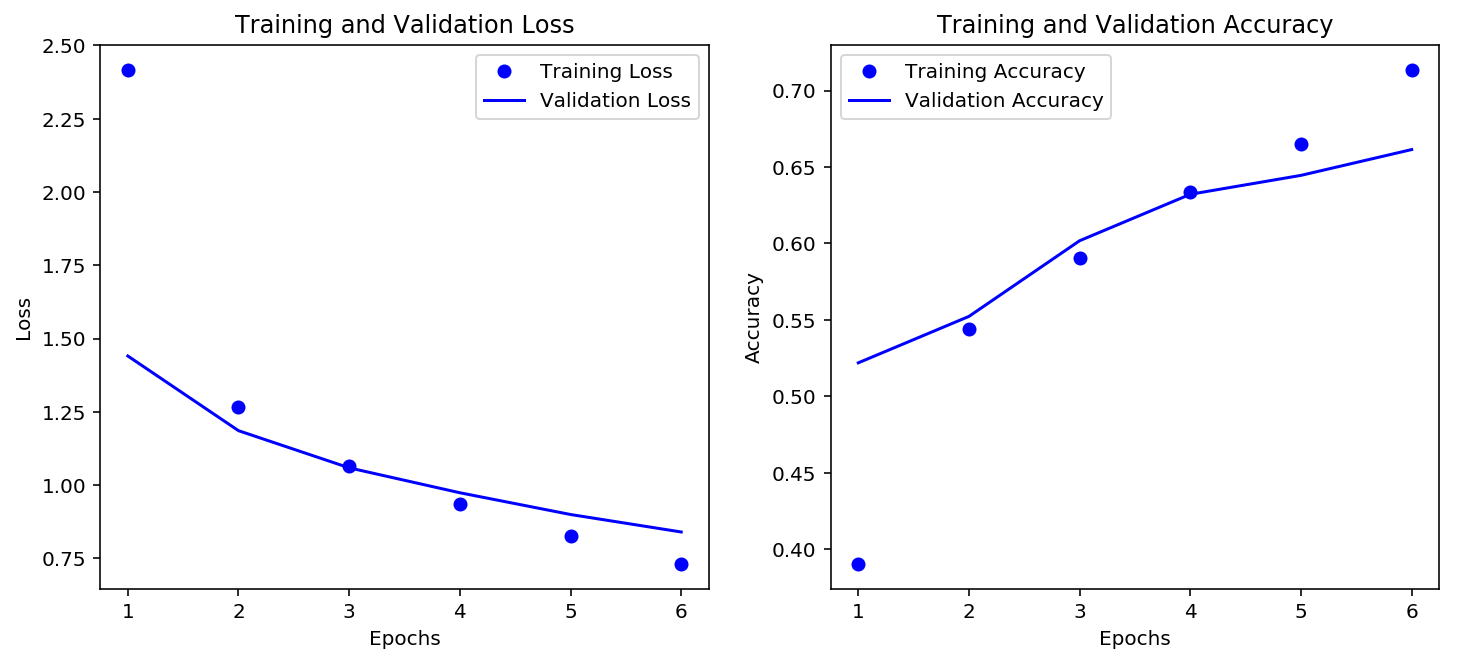

In [105]:
plot_loss_acc(hist_3)